# Is the championship won by offense or defense?
### Thing to explore:
Does championship teams 
1. Do championship teams stand out more in terms of offensive or defensive efficiency compared to the rest of the teams?
2. How do these statistics compare to other championship teams? Or other teams in the playoffs? Or from teams across the league?

Data source:
https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('databases/cbb.csv', header=None, skiprows=1)

header = pd.read_csv('databases/cbb.csv', nrows=1, header=None).iloc[0].tolist()
df.columns = header

df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,27.5,54.6,52.1,39.7,36.1,69.5,-1.2,NaN,NaN,2023
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,27.8,56.4,48.6,36.4,33.6,64.4,-2.0,NaN,NaN,2023
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,28.7,52.5,42.8,33.4,31.1,69.8,-0.3,NaN,NaN,2023
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,28.9,48.8,47.2,35.6,31.6,70.7,-0.5,NaN,NaN,2023


## Filtering data for better results

Excluding teams that have participated in less than ten seasons in total - for example, due to fresh promotion to the league, which would be unfair and the set of teams would not be equalized.

In [3]:
df_grouped = df.groupby('TEAM')['YEAR'].size()

teams_all_years = df_grouped[df_grouped == 10]
df_all_years = df[df['TEAM'].isin(teams_all_years.index)] #jakieś .isnot?

print(f"Dataset before excluding teams: {df.shape}")
print(f"Dataset after excluding teams: {df_all_years.shape}")

df_excluded_teams = df[~df['TEAM'].isin(teams_all_years.index)]
df_excluded_teams['TEAM'].unique()

Dataset before excluding teams: (3523, 24)
Dataset after excluding teams: (3330, 24)


array(['UMass Lowell', 'North Alabama', 'Brown', 'Columbia', 'Cornell',
       'Dartmouth', 'Penn', 'Princeton', 'Yale', 'Harvard',
       'Bethune Cookman', 'Maryland Eastern Shore', 'Savannah St.',
       'Arkansas Little Rock', 'Little Rock', 'Abilene Christian',
       'Houston Baptist', 'Incarnate Word', 'IPFW', 'Fort Wayne',
       'Grand Canyon', 'Cal Baptist', 'UC San Diego', 'Dixie St.',
       'Merrimack', 'Tarleton St.', 'Bellarmine', 'Utah Tech',
       'St. Thomas', 'Houston Christian', 'Lindenwood',
       'Texas A&M Commerce', 'Stonehill', 'Southern Indiana', 'Queens'],
      dtype=object)

## Creating new datafreames
1. Containing only non-playoffs teams **df_all_years_nonpo**
2. Only playoffs teams **df_all_years_po**
3. Only championship teams **df_all_years_champs**

In [4]:
df_all_years_nonpo = df_all_years[df_all_years['POSTSEASON'].isnull()]
df_all_years_nonpo.sample(5)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
122,Clemson,ACC,31,17,112.1,98.0,0.8241,50.6,47.9,15.8,...,28.5,49.1,45.5,35.2,34.9,64.5,-2.4,NaN,NaN,2016
270,Nebraska,B10,31,13,98.5,93.2,0.6543,46.2,46.8,19.4,...,38.5,48.0,44.7,28.4,33.4,63.7,-5.3,NaN,NaN,2015
616,Illinois Chicago,Horz,34,17,100.4,106.7,0.3324,50.5,48.1,22.3,...,32.2,47.6,45.7,37.0,36.0,73.2,-13.3,NaN,NaN,2017
448,Cal St. Northridge,BW,31,7,99.0,107.2,0.2858,45.3,51.0,19.5,...,35.9,44.3,48.5,33.0,36.6,65.8,-15.8,NaN,NaN,2015
770,Akron,MAC,31,17,98.4,92.9,0.6586,48.2,45.5,17.3,...,30.6,48.8,46.1,31.7,29.6,67.5,-8.1,NaN,NaN,2019


In [5]:
df_all_years_po = df_all_years[~df_all_years['POSTSEASON'].isnull()]
df_all_years_po.sample(5)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
2473,Creighton,BE,28,20,114.4,94.3,0.9025,55.7,46.9,15.8,...,25.7,56.3,46.1,36.7,32.1,69.1,3.5,S16,5.0,2021
2243,Buffalo,MAC,33,23,109.1,98.0,0.7742,48.7,48.5,16.7,...,34.3,47.6,48.0,34.1,33.0,68.9,-1.3,R64,12.0,2015
2436,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,...,34.9,55.4,44.7,36.7,35.4,68.8,9.9,S16,2.0,2019
2118,Creighton,BE,35,27,125.2,101.9,0.9144,58.9,48.5,15.0,...,33.0,56.3,47.0,41.4,34.2,65.4,5.6,R32,3.0,2014
2519,Hartford,AE,23,15,97.3,99.6,0.4345,50.4,47.6,19.0,...,25.0,51.3,50.7,32.7,28.7,66.9,-4.9,R64,16.0,2021


In [6]:
df_all_years_champs = df_all_years[df_all_years['POSTSEASON'] == 'Champions']
df_all_years_champs = df_all_years_champs.sort_values(by='YEAR').reset_index(drop=True)
df_all_years_champs.sample(5)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
2,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
8,Kansas,B12,40,34,119.8,91.3,0.9580,53.8,45.8,17.3,...,27.7,53.6,46.4,36.1,29.8,69.1,10.4,Champions,1.0,2022
6,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
7,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,31.7,54.1,48.1,41.8,34.0,68.8,6.6,Champions,1.0,2021
5,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,26.7,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018


In [7]:
all_teams_offense_means = df_all_years.groupby('YEAR')['ADJOE'].mean().reset_index()
all_teams_defense_means = df_all_years.groupby('YEAR')['ADJDE'].mean().reset_index()
all_teams_defense_means

nonpo_offense_means = df_all_years_nonpo.groupby('YEAR')['ADJOE'].mean().reset_index()
nonpo_defense_means = df_all_years_nonpo.groupby('YEAR')['ADJDE'].mean().reset_index()
nonpo_defense_means

po_offense_means = df_all_years_po.groupby('YEAR')['ADJOE'].mean().reset_index()
po_defense_means= df_all_years_po.groupby('YEAR')['ADJDE'].mean().reset_index()
po_defense_means

champ_offense_means = df_all_years_champs.groupby('YEAR')['ADJOE'].mean().reset_index()
champ_defense_means = df_all_years_champs.groupby('YEAR')['ADJDE'].mean().reset_index()
champ_defense_means

,YEAR,ADJDE
0,2013,84.5
1,2014,91.3
2,2015,90.6
3,2016,90.9
4,2017,91.5
5,2018,94.1
6,2019,89.9
7,2021,94.5
8,2022,91.3
9,2023,91.2


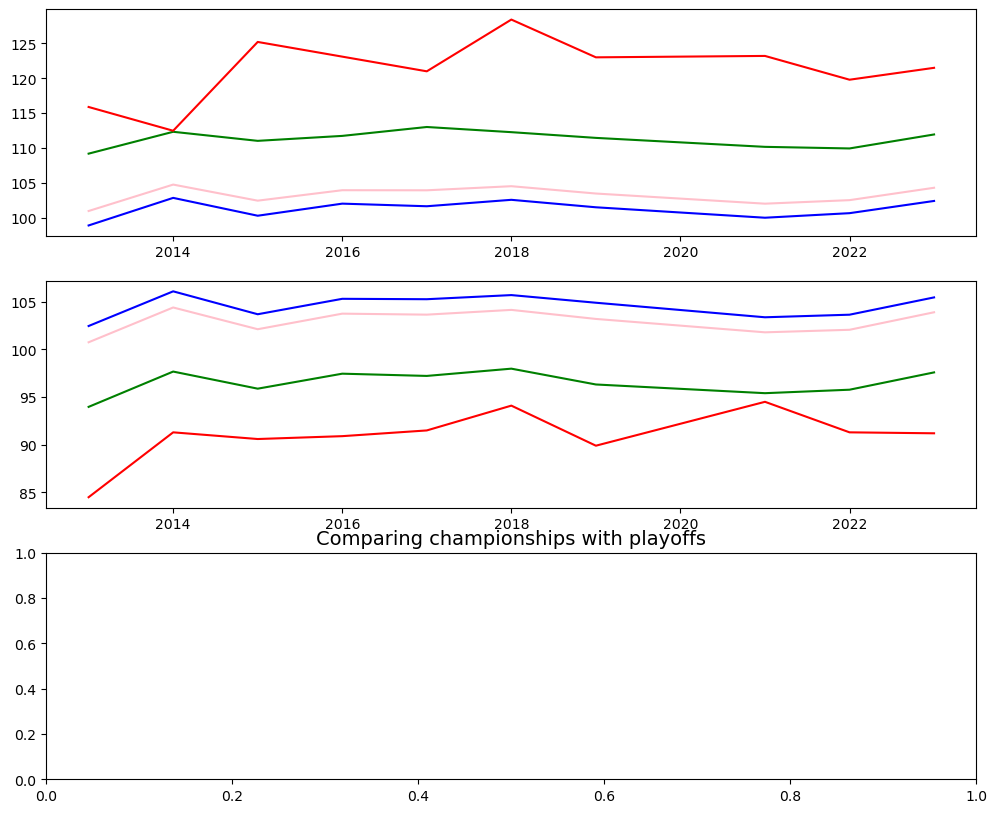

In [42]:
fig, ax = plt.subplots(3,1,figsize=(12, 10))

ax[0].plot(all_teams_offense_means['YEAR'], all_teams_offense_means['ADJOE'], color='pink')
ax[0].plot(nonpo_offense_means['YEAR'], nonpo_offense_means['ADJOE'], color='blue')
ax[0].plot(po_offense_means['YEAR'], po_offense_means['ADJOE'], color='green')
ax[0].plot(champ_offense_means['YEAR'], champ_offense_means['ADJOE'], color='red')

ax[1].plot(all_teams_defense_means['YEAR'], all_teams_defense_means['ADJDE'], color='pink')
ax[1].plot(nonpo_defense_means['YEAR'], nonpo_defense_means['ADJDE'], color='blue')
ax[1].plot(po_defense_means['YEAR'], po_defense_means['ADJDE'], color='green')
ax[1].plot(champ_defense_means['YEAR'], champ_defense_means['ADJDE'], color='red')



plt.title("Comparing championships with playoffs", fontsize=14)
plt.show()

In [1]:
df_all_years_champs

NameError: name 'df_all_years_champs' is not defined